## Kaggle Challenge - West Nile Virus Prediction

In [92]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_context("notebook")
sns.set_style('whitegrid')
sns.despine()
sns.set(font_scale=1.2)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Data Cleaning 

In [93]:
train = pd.read_csv('./datasets/train.csv')
weather = pd.read_csv('./datasets/weather_CLEAN.csv')
spray = pd.read_csv('./datasets/spray.csv')
test = pd.read_csv('./datasets/test.csv')
# weather_CLEAN = pd.read_csv('./west_nile/datasets/weather_CLEAN.csv')

In [94]:
train.groupby('Species').mean()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Species,,,,,,
CULEX ERRATICUS,10.000000,41.974689,-87.890615,9.000000,7.000000,0.000000
CULEX PIPIENS,32.799926,41.813402,-87.680481,7.424972,16.550945,0.088922
CULEX PIPIENS/RESTUANS,36.706439,41.848832,-87.705241,7.939604,13.945286,0.055135
CULEX RESTUANS,36.784307,41.859096,-87.713366,8.019708,8.551460,0.017883
CULEX SALINARIUS,32.627907,41.825134,-87.693788,7.767442,1.686047,0.000000
CULEX TARSALIS,30.500000,41.818023,-87.661568,7.500000,1.166667,0.000000
CULEX TERRITANS,36.900901,41.798297,-87.658375,7.599099,2.297297,0.000000


In [95]:
# Classifies each address into weather station 1 and 2.
train['Station'] = train['Latitude'].apply(lambda x: 1 if x>=41.85 else 0) 

In [96]:
# These functions extract the post codes from the address line.
import re

def splitstring(string):
    return string.split()[-2][:-1]

def digitfilter(string):
    if string.isdigit() == True:
        return int(string)
    else:
        return 0

In [97]:
# Adding postcode as a column for train data
train['Postcode'] = train['Address'].apply(splitstring).astype('int64', errors='ignore') 
train['Postcode'] = train['Postcode'].apply(digitfilter).astype('int64', errors='ignore')

In [98]:
# Converts date columns to datetime
train['Date'] = train['Date'].apply(lambda x: pd.to_datetime(x, yearfirst=True, dayfirst=False)) 
weather['Date'] = weather['Date'].apply(lambda x: pd.to_datetime(x, yearfirst=True, dayfirst=False))
test['Date'] = test['Date'].apply(lambda x: pd.to_datetime(x, yearfirst=True, dayfirst=False))

In [99]:
train['Day'] = train['Date'].apply(lambda x: x.day)
train['Month'] = train['Date'].apply(lambda x: x.month)
train['Year'] = train['Date'].apply(lambda x: x.year)

weather['Day_W'] = weather['Date'].apply(lambda x: x.day)
weather['Month_W'] = weather['Date'].apply(lambda x: x.month)
weather['Year_W'] = weather['Date'].apply(lambda x: x.year)

test['Day'] = test['Date'].apply(lambda x: x.day)
test['Month'] = test['Date'].apply(lambda x: x.month)
test['Year'] = test['Date'].apply(lambda x: x.year)

In [100]:
# Changes the Species column into dummy variable columns
train = pd.get_dummies(train, columns=['Species'], drop_first=True)
train_trap = pd.get_dummies(train, columns=['Trap'],drop_first=True)

In [101]:
data = pd.merge(train, weather, on=['Date', 'Station'])
data2 = pd.merge(train_trap, weather, on=['Date', 'Station'])

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 5240
Data columns (total 36 columns):
Date                              5241 non-null datetime64[ns]
Address                           5241 non-null object
Block                             5241 non-null int64
Street                            5241 non-null object
Trap                              5241 non-null object
AddressNumberAndStreet            5241 non-null object
Latitude                          5241 non-null float64
Longitude                         5241 non-null float64
AddressAccuracy                   5241 non-null int64
NumMosquitos                      5241 non-null int64
WnvPresent                        5241 non-null int64
Station                           5241 non-null int64
Postcode                          5241 non-null int64
Day                               5241 non-null int64
Month_x                           5241 non-null int64
Year_x                            5241 non-null int64
Species_CULE

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 14 columns):
Id                        116293 non-null int64
Date                      116293 non-null datetime64[ns]
Address                   116293 non-null object
Species                   116293 non-null object
Block                     116293 non-null int64
Street                    116293 non-null object
Trap                      116293 non-null object
AddressNumberAndStreet    116293 non-null object
Latitude                  116293 non-null float64
Longitude                 116293 non-null float64
AddressAccuracy           116293 non-null int64
Day                       116293 non-null int64
Month                     116293 non-null int64
Year                      116293 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 12.4+ MB


In [104]:
data.head()

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,DewPoint,WetBulb,Heat,Cool,PrecipTotal,Month_y,Year_y,Day_W,Month_W,Year_W
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,58,65.0,0.0,9.0,0.0,5,2007,29,5,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,58,65.0,0.0,9.0,0.0,5,2007,29,5,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,58,65.0,0.0,9.0,0.0,5,2007,29,5,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,58,65.0,0.0,9.0,0.0,5,2007,29,5,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,58,65.0,0.0,9.0,0.0,5,2007,29,5,2007


In [105]:
data.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'], axis=1, inplace=True)
data.drop(['Month_x', 'Year_x'], axis=1, inplace=True)
data.drop(['Month_y', 'Year_y'], axis=1, inplace=True)
data.drop(['Day'], axis=1, inplace=True)
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [106]:
data.head()

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Postcode,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,...,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,Day_W,Month_W,Year_W
0,2007-05-29,T002,41.954690,-87.800991,1,0,1,60634,0,1,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007
1,2007-05-29,T002,41.954690,-87.800991,1,0,1,60634,0,0,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007
2,2007-05-29,T007,41.994991,-87.769279,1,0,1,60646,0,0,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007
3,2007-05-29,T015,41.974089,-87.824812,1,0,1,60656,0,1,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007
4,2007-05-29,T015,41.974089,-87.824812,4,0,1,60656,0,0,...,60,74.0,58,65.0,0.0,9.0,0.0,29,5,2007


In [107]:
# Dummy coded variable
# The category you leave out, which the other columns are relative to is often referred to as the reference category.
dummy = pd.get_dummies(data['Trap'],drop_first=True)
data = pd.concat([data, dummy], axis=1)
data.drop(['Trap'], axis=1, inplace=True)

In [108]:
data.head()

,Date,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Postcode,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,...,T223,T224,T228,T230,T231,T232,T233,T236,T900,T903
0,2007-05-29,41.954690,-87.800991,1,0,1,60634,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,41.954690,-87.800991,1,0,1,60634,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,41.994991,-87.769279,1,0,1,60646,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,41.974089,-87.824812,1,0,1,60656,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,41.974089,-87.824812,4,0,1,60656,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [109]:
data.drop(['Latitude'], axis=1, inplace=True)
data.drop(['Longitude'], axis=1, inplace=True)

### Feature Selection

In [110]:
from sklearn.feature_selection import RFECV, SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

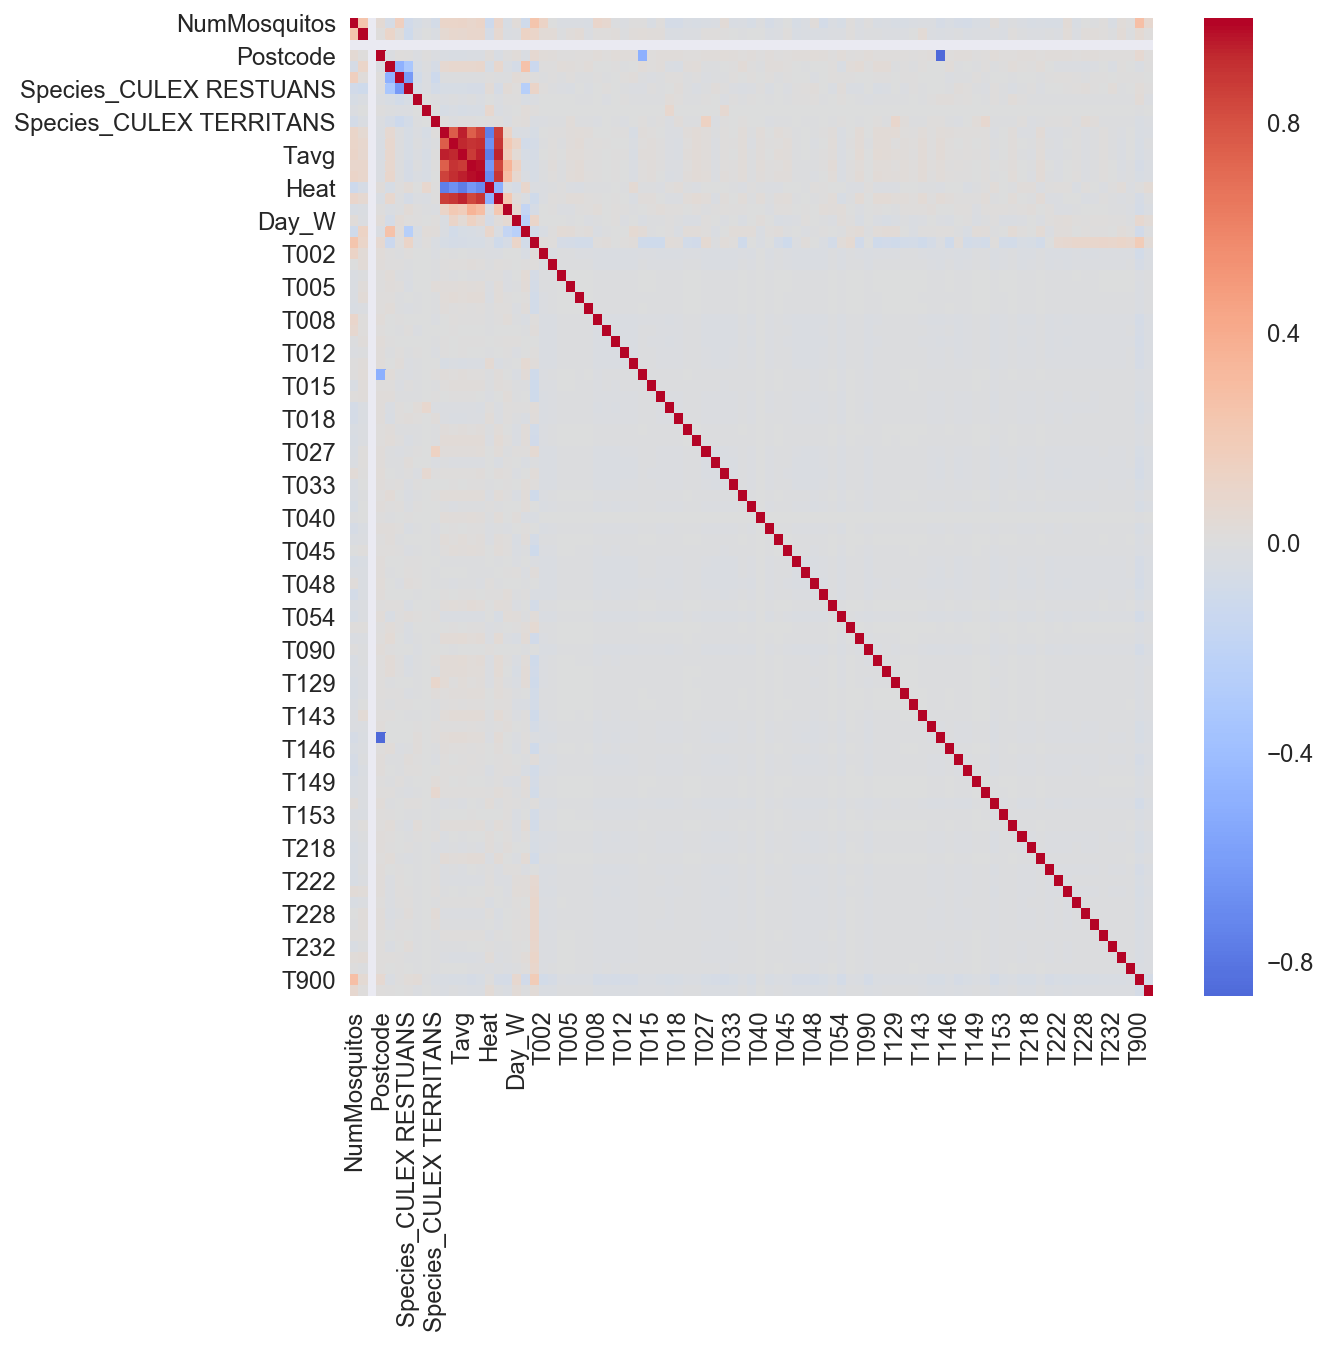

In [114]:
fig, ax = plt.subplots(figsize=(9,9)) 
sns.heatmap(data.corr(), cmap='coolwarm', center=0)

In [116]:
data.drop(['Date'], axis=1, inplace=True)

### First model

In [117]:
cols = list(data.columns)
cols.remove('WnvPresent')

X = data[cols]
y = data.WnvPresent.values

In [118]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# Train the selector on the data.
skb_f.fit(X, y)
skb_chi2.fit(X, y)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest

,feature,f_classif,chi2 score
0,NumMosquitos,330.988,5620.29
18,Month_W,88.7546,14.0693
19,Year_W,65.1171,0.168763
5,Species_CULEX RESTUANS,60.0456,41.8696
3,Species_CULEX PIPIENS,58.3816,45.9128
12,DewPoint,43.6109,44.3456
13,WetBulb,42.278,30.9583
10,Tmin,34.0498,32.4989
11,Tavg,26.9358,21.3912
15,Cool,22.0294,87.7651


In [43]:
cols = ['Month_W', 'Species_CULEX RESTUANS', 'Species_CULEX PIPIENS','DewPoint', 'WetBulb']

X = data[cols]
y = data.WnvPresent.values

In [44]:
from sklearn.preprocessing import StandardScaler

# scale the data
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

accs = cross_val_score(model, Xs, y, cv=10)
print accs
print np.mean(accs)

[ 0.94095238  0.58857143  0.94095238  0.94274809  0.88740458  0.94274809
  0.49427481  0.76908397  0.57361377  0.46845124]
0.754880074202


In [58]:
test['Station'] = test['Latitude'].apply(lambda x: 1 if x>=41.85 else 0)
test['Date'] = test['Date'].apply(lambda x: pd.to_datetime(x, yearfirst=True, dayfirst=False))
test['Day'] = test['Date'].apply(lambda x: x.day)
test['Month'] = test['Date'].apply(lambda x: x.month)
test['Year'] = test['Date'].apply(lambda x: x.year)

In [69]:
weather['Station'] = weather['Station'].apply(lambda x: 1 if x>=41.85 else 0)

In [70]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,Day,Month,Year
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,11,6,2008
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,11,6,2008
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,11,6,2008
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,11,6,2008
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,11,6,2008


In [67]:
predict_data = pd.merge(test, weather, on=['Date', 'Station']) # Merges test data with weather data

In [68]:
predict_data.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,Month_y,Year_y


In [ ]:
X_test = predict_data[['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'WetBulb']].values
Xs_test = ss.fit_transform(X_test)